
### SmallHolocleanExperimentWithAdultData: Fairness & Repair Exploratory Analysis - Kushagra Ghosh

One more experiment with Holoclean. Check if the distribution after the repair changes.

1. Take the Adult dataset from https://github.com/HoloClean/holoclean/blob/master/testdata/AdultFull.csv. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/HoloClean/holoclean/master/testdata/AdultFull.csv"
df = pd.read_csv(url)
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
print(df.eq('?').sum().sum())
df = df.replace('?', None)

6465


In [3]:
display(df)

,Age,Workclass,Education,Maritalstatus,Occupation,Relationship,Race,Sex,HoursPerWeek,Country,Income
0,31-50,private,some-college,married-civ-spouse,craft-repair,husband,white,male,40,united-states,lessthan50k
1,>50,federal-gov,some-college,never-married,exec-managerial,own-child,black,female,40,united-states,lessthan50k
2,31-50,private,bachelors,married-civ-spouse,sales,husband,white,male,50,united-states,lessthan50k
3,22-30,self-emp-inc,hs-grad,never-married,craft-repair,own-child,white,male,40,united-states,lessthan50k
4,22-30,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,female,40,united-states,lessthan50k
...,...,...,...,...,...,...,...,...,...,...,...
48837,18-21,private,12th,never-married,craft-repair,own-child,white,male,40,united-states,lessthan50k
48838,22-30,private,some-college,never-married,adm-clerical,not-in-family,black,male,18-21,united-states,lessthan50k
48839,18-21,private,11th,never-married,other-service,own-child,white,female,18-21,united-states,lessthan50k
48840,22-30,local-gov,masters,never-married,prof-specialty,not-in-family,white,female,40,united-states,lessthan50k


In [4]:
def satisfiesDC(df, col1, val1, col2, val2):
    display(df[(df[col1] == val1) & (df[col2] == val2)])
    return df[df[col1] == val1][col2].eq(val2).sum() == 0

print(satisfiesDC(df,'Sex','female','Relationship','husband'))
print(satisfiesDC(df,'Sex','male','Relationship','wife'))

,Age,Workclass,Education,Maritalstatus,Occupation,Relationship,Race,Sex,HoursPerWeek,Country,Income
4,22-30,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,female,40,united-states,lessthan50k
11,>50,private,hs-grad,married-civ-spouse,sales,husband,white,female,48,united-states,morethan50k
26,18-21,private,hs-grad,never-married,adm-clerical,husband,white,female,40,united-states,lessthan50k
504,31-50,private,assoc-voc,married-civ-spouse,tech-support,husband,white,female,43,united-states,lessthan50k
652,31-50,private,7th-8th,married-civ-spouse,farming-fishing,husband,white,female,40,mexico,lessthan50k
1084,22-30,state-gov,some-college,married-civ-spouse,exec-managerial,husband,white,female,40,united-states,morethan50k
3929,31-50,private,hs-grad,married-civ-spouse,sales,husband,white,female,40,united-states,lessthan50k


False


,Age,Workclass,Education,Maritalstatus,Occupation,Relationship,Race,Sex,HoursPerWeek,Country,Income
689,31-50,private,11th,divorced,farming-fishing,wife,white,male,40,united-states,lessthan50k
703,22-30,private,assoc-acdm,married-civ-spouse,tech-support,wife,white,male,40,united-states,lessthan50k
8736,22-30,private,bachelors,married-civ-spouse,exec-managerial,wife,white,male,40,united-states,morethan50k
14046,>50,local-gov,10th,married-civ-spouse,machine-op-inspct,wife,white,male,40,None,lessthan50k
16666,31-50,private,bachelors,married-civ-spouse,sales,wife,white,male,60,None,lessthan50k


False


The adult dataset had 6465 empty/null values. 7 rows from the dataset violate the 'female' & 'husband' denial constraint. 5 rows from the dataset violate the 'male' & 'wife' denian constraint. 

In [5]:
df.to_csv('adult_experiment.csv',index=False)

2. Take the constraints from https://github.com/HoloClean/holoclean/blob/master/testdata/adult_constraints.txt.

In [6]:
import requests

constraints = "https://raw.githubusercontent.com/HoloClean/holoclean/master/testdata/adult_constraints.txt"
response = requests.get(constraints)
with open("adult_constraints.txt", "wb") as file:
    file.write(response.content)

3. Run Holoclean with the dataset and constraints and see how the Sex distribution changes. 

In [7]:
import psycopg2

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    database="holo",
    user="holocleanuser",
    password="abcd1234"
)

# Execute an SQL query and create a dataframe hospital_repaired
holoclean_data = pd.read_sql("SELECT * FROM adult_experiment_repaired", conn).iloc[:, 1:]

conn.close()

#Alternatively, access the new adult data from the terminal in holoclean with:  1.   --user postgres     2. \c holo    3. \dt 

/Users/kushagraghosh/opt/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [8]:
print(holoclean_data.isna().sum().sum())
print(holoclean_data.eq('_nan_').sum().sum())
holoclean_data = holoclean_data.replace('_nan_', np.nan)
print(holoclean_data.eq('?').sum().sum())

0
5608
0


In [9]:
comparing_adult = df.compare(holoclean_data)
display(comparing_adult)
print(f"{comparing_adult.shape[0]} tuples (rows) out of a total {df.shape[0]} were changed")

Age        Workclass                Education                \
        self  other      self      other          self         other   
44       NaN    NaN       NaN        NaN           NaN           NaN   
77       NaN    NaN       NaN        NaN           NaN           NaN   
113    18-21  31-50       NaN        NaN           NaN           NaN   
114      >50  18-21       NaN        NaN  some-college       hs-grad   
115    31-50    >50       NaN        NaN       hs-grad  some-college   
...      ...    ...       ...        ...           ...           ...   
48603    >50  31-50   private  local-gov           NaN           NaN   
48719    NaN    NaN       NaN        NaN           NaN           NaN   
48795    NaN    NaN       NaN        NaN           NaN           NaN   
48799    NaN    NaN       NaN        NaN           NaN           NaN   
48804    NaN    NaN       NaN        NaN           NaN           NaN   

       Maritalstatus                      Occupation                    ...  \
                self          other             self             other  ...   
44               NaN            NaN              NaN               NaN  ...   
77               NaN            NaN              NaN               NaN  ...   
113    never-married        widowed    other-service             sales  ...   
114          widowed  never-married  exec-managerial     other-service  ...   
115         divorced        widowed              NaN               NaN  ...   
...              ...            ...              ...               ...  ...   
48603       divorced        widowed     adm-clerical  transport-moving  ...   
48719            NaN            NaN              NaN               NaN  ...   
48795            NaN            NaN              NaN               NaN  ...   
48799            NaN            NaN              NaN               NaN  ...   
48804            NaN            NaN              NaN               NaN  ...   

                     Race                         Sex         HoursPerWeek  \
                     self               other    self   other         self   
44                    NaN                 NaN     NaN     NaN          NaN   
77                    NaN                 NaN     NaN     NaN          NaN   
113    asian-pac-islander               white     NaN     NaN        18-21   
114                 white  asian-pac-islander    male  female           60   
115                   NaN                 NaN  female    male           40   
...                   ...                 ...     ...     ...          ...   
48603                 NaN                 NaN     NaN     NaN          NaN   
48719                 NaN                 NaN     NaN     NaN          NaN   
48795                 NaN                 NaN     NaN     NaN          NaN   
48799                 NaN                 NaN     NaN     NaN          NaN   
48804                 NaN                 NaN     NaN     NaN          NaN   

             Country                Income        
       other    self          other   self other  
44       NaN    None  united-states    NaN   NaN  
77       NaN    None  united-states    NaN   NaN  
113       40     NaN            NaN    NaN   NaN  
114    18-21     NaN            NaN    NaN   NaN  
115       60     NaN            NaN    NaN   NaN  
...      ...     ...            ...    ...   ...  
48603    NaN     NaN            NaN    NaN   NaN  
48719    NaN    None  united-states    NaN   NaN  
48795    NaN    None  united-states    NaN   NaN  
48799    NaN    None  united-states    NaN   NaN  
48804    NaN    None  united-states    NaN   NaN  

[32615 rows x 22 columns]

32615 tuples (rows) out of a total 48842 were changed


In [10]:
display(holoclean_data)

,Age,Workclass,Education,Maritalstatus,Occupation,Relationship,Race,Sex,HoursPerWeek,Country,Income
0,31-50,private,some-college,married-civ-spouse,craft-repair,husband,white,male,40,united-states,lessthan50k
1,>50,federal-gov,some-college,never-married,exec-managerial,own-child,black,female,40,united-states,lessthan50k
2,31-50,private,bachelors,married-civ-spouse,sales,husband,white,male,50,united-states,lessthan50k
3,22-30,self-emp-inc,hs-grad,never-married,craft-repair,own-child,white,male,40,united-states,lessthan50k
4,22-30,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,female,40,united-states,lessthan50k
...,...,...,...,...,...,...,...,...,...,...,...
48837,18-21,private,12th,never-married,craft-repair,own-child,white,male,40,united-states,lessthan50k
48838,22-30,private,some-college,never-married,adm-clerical,not-in-family,black,male,18-21,united-states,lessthan50k
48839,18-21,private,11th,never-married,other-service,own-child,white,female,18-21,united-states,lessthan50k
48840,22-30,local-gov,masters,never-married,prof-specialty,not-in-family,white,female,40,united-states,lessthan50k


Our conjecture is that since the constraints include the "Sex" attribute, the distribution of this attribute will change. 

In [11]:
def piechart(title, df, ax, column):
    df[column].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax)
    display(df[column].value_counts())
    ax.set_title(title)

male      32646
female    16196
Name: Sex, dtype: int64

male      32646
female    16196
Name: Sex, dtype: int64

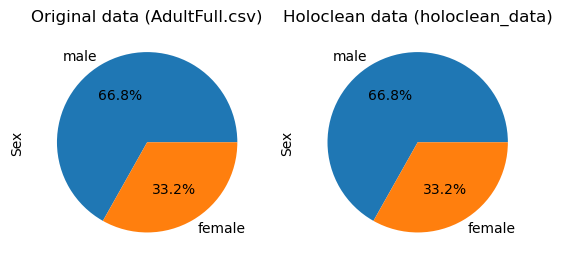

In [12]:
fig, axs = plt.subplots(1, 2)
piechart(f"Original data (AdultFull.csv)", df, axs[0], 'Sex')
piechart(f"Holoclean data (holoclean_data)", holoclean_data, axs[1], 'Sex')
plt.show()

In [13]:
def barplotForAvg(title, df, column, ax):
    df.pivot_table(values='IncomeBinary', index=column, aggfunc='mean').sort_values(ascending=False, by='IncomeBinary').plot.bar(ax=ax)
    display(df.pivot_table(values='IncomeBinary', index=column, aggfunc='mean').sort_values(ascending=False, by='IncomeBinary'))
    #ax.axhline(avg_income, color='red', linewidth=2)
    ax.set_title(title)

In [14]:
df['IncomeBinary'] = df['Income'].apply(lambda x: 1 if x == 'morethan50k' else 0)
holoclean_data['IncomeBinary'] = holoclean_data['Income'].apply(lambda x: 1 if x == 'morethan50k' else 0)

,IncomeBinary
Sex,
male,0.303774
female,0.109348


,IncomeBinary
Sex,
male,0.303774
female,0.109348


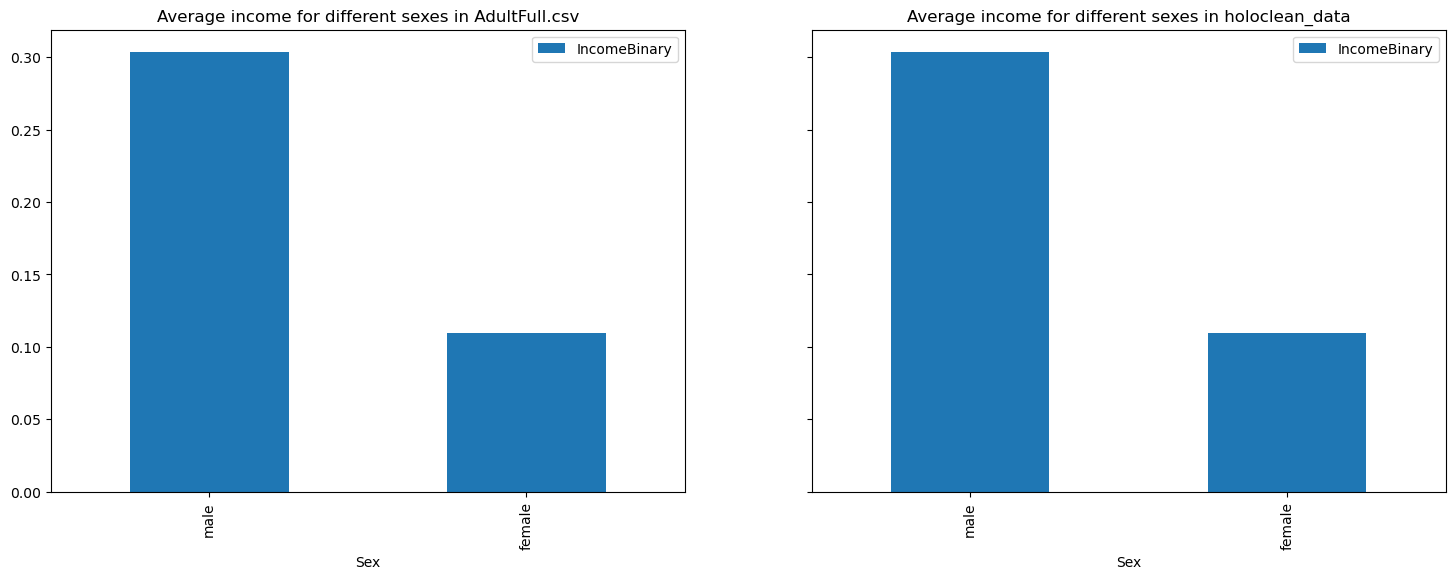

In [15]:
fig, axs = plt.subplots(1,2, figsize=(18,6), sharey=True)
barplotForAvg("Average income for different sexes in AdultFull.csv", df, 'Sex', axs[0])
barplotForAvg("Average income for different sexes in holoclean_data", holoclean_data, 'Sex', axs[1])
plt.show()

In [16]:
print(satisfiesDC(holoclean_data,'Sex','female','Relationship','husband'))
print(satisfiesDC(holoclean_data,'Sex','male','Relationship','wife'))

,Age,Workclass,Education,Maritalstatus,Occupation,Relationship,Race,Sex,HoursPerWeek,Country,Income,IncomeBinary
4,22-30,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,female,40,united-states,lessthan50k,0
11,>50,private,hs-grad,married-civ-spouse,sales,husband,white,female,48,united-states,morethan50k,1
26,18-21,private,hs-grad,never-married,adm-clerical,husband,white,female,40,united-states,lessthan50k,0
504,31-50,private,assoc-voc,married-civ-spouse,tech-support,husband,white,female,43,united-states,lessthan50k,0
652,31-50,private,7th-8th,married-civ-spouse,farming-fishing,husband,white,female,40,mexico,lessthan50k,0
1084,22-30,state-gov,some-college,married-civ-spouse,exec-managerial,husband,white,female,40,united-states,morethan50k,1
3929,31-50,private,hs-grad,married-civ-spouse,sales,husband,white,female,40,united-states,lessthan50k,0


False


,Age,Workclass,Education,Maritalstatus,Occupation,Relationship,Race,Sex,HoursPerWeek,Country,Income,IncomeBinary
689,31-50,private,11th,divorced,farming-fishing,wife,white,male,40,united-states,lessthan50k,0
703,22-30,private,assoc-acdm,married-civ-spouse,tech-support,wife,white,male,40,united-states,lessthan50k,0


False


The holoclean dataset had 32615 tuples (rows) out of a total 48842 tuples changed from the original AdultFull dataset. The holoclean dataset had 6465 empty/null values. 7 rows from the holoclean dataset violate the 'female' & 'husband' denial constraint (no change). 2 rows from the holoclean dataset violate the 'male' & 'wife' denian constraint (5 rows less than Adult dataset). 